<a href="https://colab.research.google.com/github/Ntelhon/Weather_Temp_Prediction_ANN/blob/master/ANN_MT1v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np # For numerical computations
import matplotlib.pyplot as plt # For visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import keras
from keras import layers

In [22]:
# Load the dataset
data = pd.read_csv('train.csv')

In [23]:
def data_preprocessing(data):
  preprocessed_data = data.copy()
  preprocessed_data["temp-2"] = data["temp"].shift(periods=2)
  preprocessed_data["temp-3"] = data["temp"].shift(periods=3)
  preprocessed_data["temp-1"] = data["temp"].shift(periods=1)
  preprocessed_data["pressure-1"] = data["pressure"].shift(periods=1)
  preprocessed_data["pressure-2"] = data["pressure"].shift(periods=2)
  preprocessed_data["pressure-3"] = data["pressure"].shift(periods=3)
  preprocessed_data["humidity-1"] = data["humidity"].shift(periods=1)
  preprocessed_data["humidity-2"] = data["humidity"].shift(periods=2)
  preprocessed_data["humidity-3"] = data["humidity"].shift(periods=3)
  preprocessed_data["wind_speed-1"] = data["wind_speed"].shift(periods=1)
  preprocessed_data["wind_speed-2"] = data["wind_speed"].shift(periods=2)
  preprocessed_data["wind_speed-3"] = data["wind_speed"].shift(periods=3)
  preprocessed_data = preprocessed_data.dropna()
  preprocessed_data = preprocessed_data.drop(["feels_like", "temp_min", "temp_max", "wind_deg", "clouds_all", "weather_id","weather_main","weather_description","weather_icon"], axis=1)
  return preprocessed_data

In [31]:
data = data_preprocessing(data)
print(data.head())

X = data[['temp-1', 'temp-2', 'temp-3', 'pressure-1', 'pressure-2', 'pressure-3', 'humidity-1', 'humidity-2', 'humidity-3', 'wind_speed-1', 'wind_speed-2', 'wind_speed-3']]# Input features
Y = data['temp']  # Target variable (average temperature)

           dt                 date    temp  ...  wind_speed-1  wind_speed-2  wind_speed-3
3  1704078000  2024-01-01 03:00:00  284.32  ...          2.06          1.54          2.57
4  1704081600  2024-01-01 04:00:00  284.23  ...          1.54          2.06          1.54
5  1704085200  2024-01-01 05:00:00  284.23  ...          1.03          1.54          2.06
6  1704088800  2024-01-01 06:00:00  284.32  ...          1.03          1.03          1.54
7  1704092400  2024-01-01 07:00:00  284.41  ...          0.00          1.03          1.03

[5 rows x 18 columns]


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Build the neural network model
model = keras.Sequential()
model.add(layers.Dense(8, input_dim=12, activation='relu'))  # Adjust number of neurons if needed
model.add(layers.Dense(4, activation='relu'))
# model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='linear')) # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


165/165 - 2s - 13ms/step - loss: 84224.7266 - val_loss: 83277.1719
Epoch 2/50
165/165 - 0s - 2ms/step - loss: 80749.3125 - val_loss: 77312.8906
Epoch 3/50
165/165 - 0s - 2ms/step - loss: 70396.4844 - val_loss: 62003.2969
Epoch 4/50
165/165 - 0s - 2ms/step - loss: 51258.5312 - val_loss: 40909.9648
Epoch 5/50
165/165 - 0s - 2ms/step - loss: 31756.4707 - val_loss: 24740.5703
Epoch 6/50
165/165 - 0s - 2ms/step - loss: 19822.2227 - val_loss: 17156.4629
Epoch 7/50
165/165 - 1s - 4ms/step - loss: 15162.8652 - val_loss: 14422.1309
Epoch 8/50
165/165 - 0s - 2ms/step - loss: 13249.6572 - val_loss: 12906.9912
Epoch 9/50
165/165 - 0s - 2ms/step - loss: 11885.0928 - val_loss: 11599.6260
Epoch 10/50
165/165 - 0s - 2ms/step - loss: 10588.9785 - val_loss: 10308.8076
Epoch 11/50
165/165 - 1s - 4ms/step - loss: 9290.1660 - val_loss: 9027.0771
Epoch 12/50
165/165 - 0s - 2ms/step - loss: 8024.7637 - val_loss: 7776.9453
Epoch 13/50
165/165 - 1s - 4ms/step - loss: 6807.6836 - val_loss: 6602.3267
Epoch 14/50

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error on Test Set: 4.2979175965256164


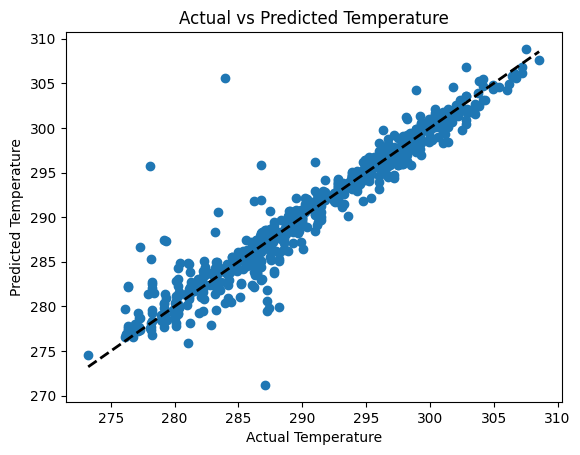

In [34]:
# Make predictions on the test set
Y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# plot the results
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

In [35]:
# Save the model
# model.save('3DaytoNextv1.h5')
model.save('3DaytoNextv1.1.keras')


In [42]:
novData = pd.read_csv('november.csv')
novData = data_preprocessing(novData)
X = novData[['temp-1', 'temp-2', 'temp-3', 'pressure-1', 'pressure-2', 'pressure-3', 'humidity-1', 'humidity-2', 'humidity-3', 'wind_speed-1', 'wind_speed-2', 'wind_speed-3']]# Input features
Y = novData['temp']  # Target variable
X_scaled = scaler.transform(X)
Y_pred = model.predict(X_scaled)

# Evaluate the model
mse = mean_squared_error(Y, Y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# plt.scatter(novData['dt'], Y, Y_pred)
# plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
# plt.xlabel('Actual Temperature')
# plt.ylabel('Predicted Temperature')
# plt.title('Actual vs Predicted Temperature')
# plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Squared Error on Test Set: 4.821325953728076


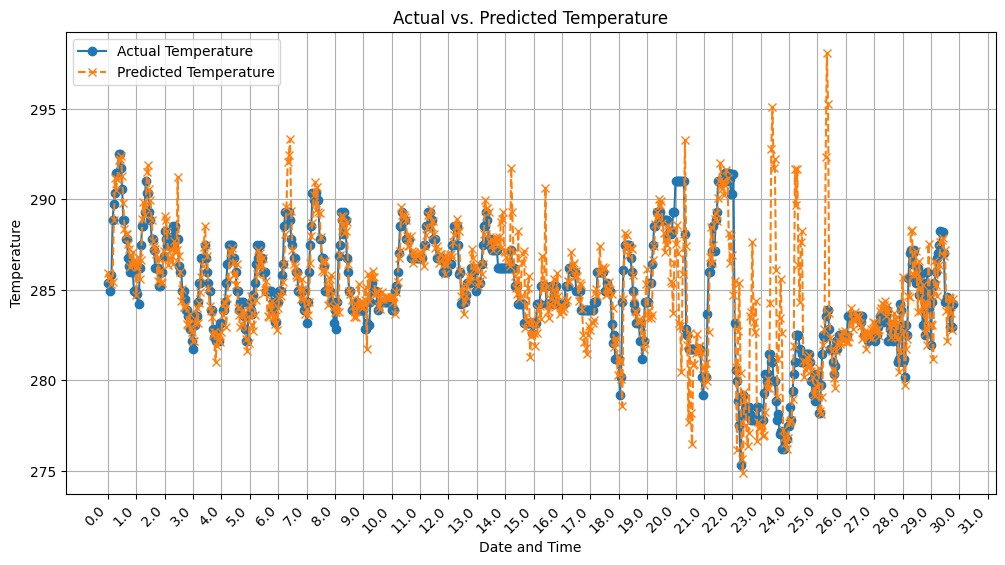

In [56]:
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

# Plot the data
plt.plot(novData['date'], Y, label='Actual Temperature', marker='o', linestyle='-')
plt.plot(novData['date'], Y_pred, label='Predicted Temperature', marker='x', linestyle='--')


x_ticks_values = np.arange(0, 31*24+1, 24)  # Define your desired tick values
x_ticks_labels = [str(val/24) for val in x_ticks_values] # Convert values to strings for labels
plt.xticks(rotation=45, ha='right') # Rotate labels 45 degrees and align right

plt.xticks(x_ticks_values, x_ticks_labels) # Set the x-axis ticks

plt.xlabel('Date and Time')
plt.ylabel('Temperature')
plt.title('Actual vs. Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()